# Centering and Scaling


---
- Centering and Scaling, also called Normalizing or Standardizing is another method to preprocess the data, to prepare for ML model.
- As many models use some form of distance to inform them about the data, so we need to features to be in the same scale.
- To tackle this, we perform scaling and centering of our data.

**Ways to scale our data**
  1. Subtract the mean and divide by variance:
        - All features will be centered around 0 and have variance of 1.
        - It is called 'Standardization'.
  
  2. Subtract the minimun and divide by range of data:
        - All features will have minimum 0 and minimum 1.
  
  3. Normalize data so it ranges from -1 to 1.

Here, we will use StandardScaler() for scaling the data.


**Scaling with scikit learn**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

music_df= pd.read_csv("/content/drive/MyDrive/music_clean.csv")
music_df.head(20)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934000,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012000,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897000,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063000,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995000,0.300,1
5,35111,62.0,0.010800,0.743,243333.0,0.670,0.070200,0.2200,-4.547,0.0293,110.832000,0.934,1
6,35594,58.0,0.001070,0.500,207173.0,0.836,0.000040,0.1970,-6.165,0.0454,90.011000,0.410,1
7,37473,74.0,0.076400,0.686,200467.0,0.783,0.000000,0.1630,-4.977,0.1190,119.952961,0.814,1
8,37418,64.0,0.002720,0.235,227296.0,0.860,0.096900,0.3880,-2.842,0.0561,127.788000,0.342,1
9,36605,55.0,0.122000,0.500,173773.0,0.854,0.000000,0.0794,-5.151,0.0945,94.960000,0.404,1


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [ ]:
X = music_df.drop('genre',axis=1).values
y = music_df['genre'].values

In [ ]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=42)

In [ ]:
#instantiate the scaler
scaler = StandardScaler()

In [ ]:
#scaling the features data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#comparing scaled and non scaled data
print(np.mean(X),np.std(X))
print(np.mean(X_train_scaled),np.std(X_train_scaled))

20666.582585618085 68890.98734103922
6.361049253471373e-16 1.0000000000000002


We can see now our data is in smaller scale.

**Scaling in a pipeline**

In [ ]:
#declare the steps
steps =[('scaler',StandardScaler()),
         ('knn', KNeighborsClassifier(n_neighbors=6))]

#create pipeline
pipeline = Pipeline(steps)

#fit train data on pipeline to create scaled data
knn_scaled = pipeline.fit(X_train,y_train)

#make predictions
y_pred = knn_scaled.predict(X_test)

print(knn_scaled.score(X_test,y_test))

0.9066666666666666


**Cross Validation and Scaling in a pipeline**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#declare steps
steps = [('scaler',StandardScaler()),
         ('knn',KNeighborsClassifier(n_neighbors=6))]

#instantiate pipeline
pipeline = Pipeline(steps)

#create param grid
parameters = {'knn__n_neighbors':np.arange(1,50)}

#cross validation
cv = GridSearchCV(pipeline, param_grid = parameters)

cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)

print(cv.best_score_)
print(cv.best_params_)

0.9242857142857144
{'knn__n_neighbors': 4}


# Evaluating the performances of multiple models


---
For Regression Model:
  1. RMSE,
  2. R-squared

For Classification Model:
  1. Accuracy,
  2. Confusion Matrix,
  3. Precision, Recall, F1-score,
  4. ROC, AUC

- Models affected by Scaling:
    - KNN,
    - Linear Regression (plus Ridge, Lasso),
    - Logistic Regression,
    - ANN
  
  Note: It is best to scale our data before evaluating the model.


In [ ]:
#evaluating performances of Logistic Regression, KNN and Decision Tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
X = music_df.drop('genre',axis=1).values
y = music_df['genre'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,
                                                    random_state =42)


In [ ]:
scaler= StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#create dictionary of multiple models
models = {'logreg':LogisticRegression(),
          'knn':KNeighborsClassifier(n_neighbors=6),
          'Decision Tree': DecisionTreeClassifier()}

results= []

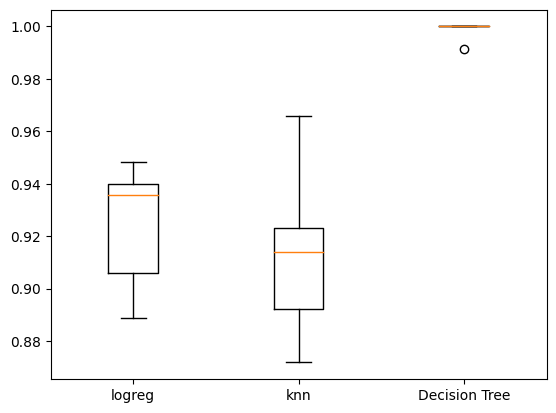

In [ ]:
#apply kfold and cv in multiple models to measure accuracy

for model in models.values():
  kf = KFold(n_splits=6, shuffle = True, random_state =42)
  cv_results = cross_val_score(model, X_train_scaled, y_train,
                               cv = kf)
  results.append(cv_results)

plt.boxplot(results,labels=models.keys())
plt.show()

In [ ]:
#testing models on test set

for name,model in models.items():
  model.fit(X_train_scaled, y_train)
  test_score = model.score(X_test_scaled,y_test)

  print('Test set accuracy:{},{}'.format(name,test_score))

Test set accuracy:logreg,0.89
Test set accuracy:knn,0.9066666666666666
Test set accuracy:Decision Tree,1.0
